In [33]:
import pandas as pd

In [34]:
data = pd.read_csv("train.csv")

In [35]:
import missingno as msno    

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

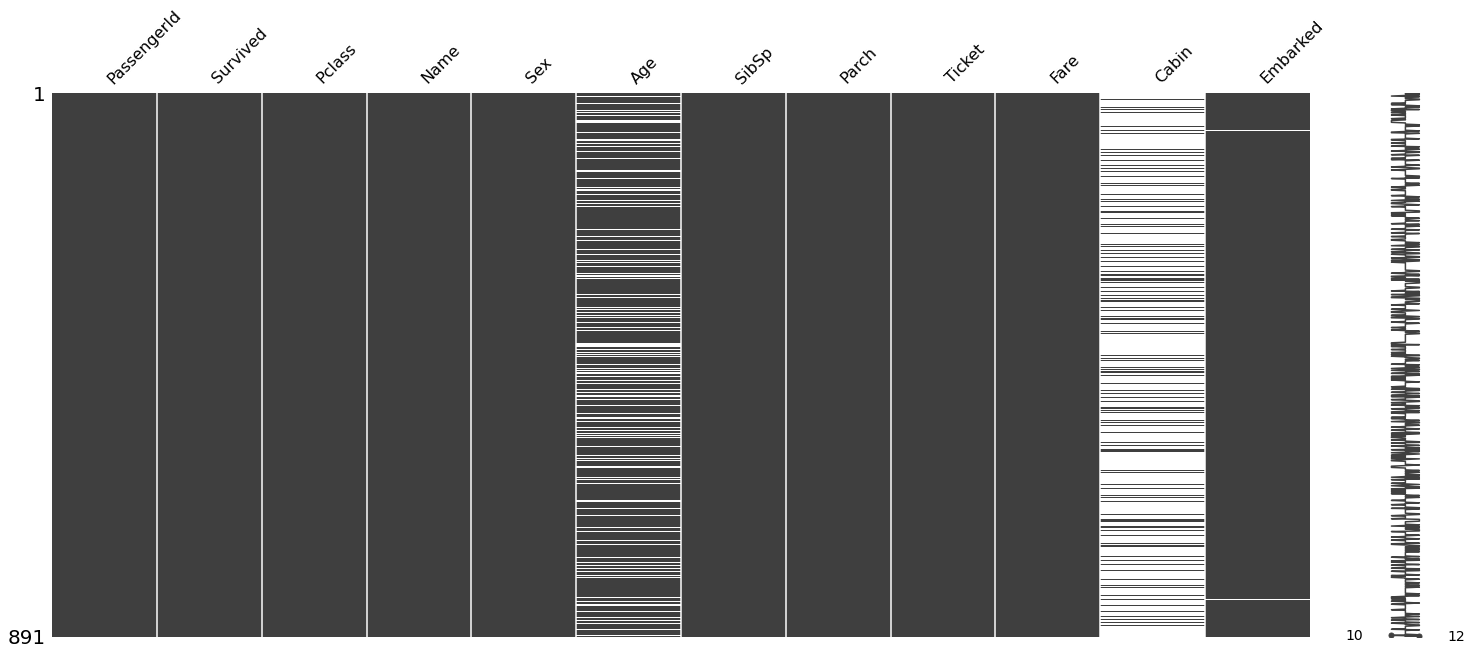

In [38]:
msno.matrix(data)

In [39]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "simple_white"

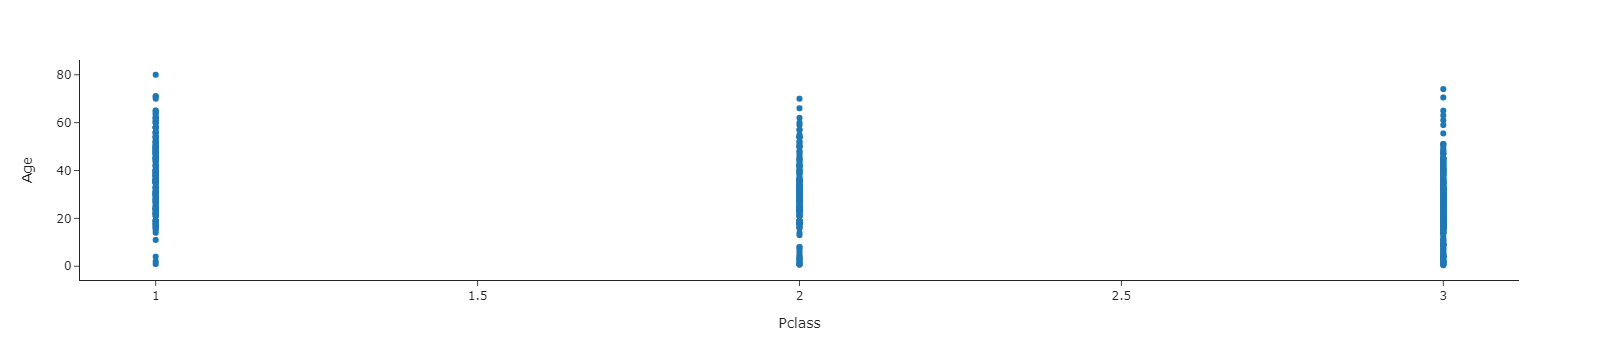

In [40]:
(
    px.scatter(data, x='Pclass' , y='Age')
   .show()
)

`pclass`: Ticket class

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

In [41]:
data.groupby("Pclass").describe().Age

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [42]:
def impute_age(cols, age_class1=42, age_class2=26, age_class3=24):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return age_class1
        elif Pclass == 2:
            return age_class2
        else:
            return age_class3
    else:
        return Age

In [43]:
data["Age"] = data[['Age', 'Pclass']].apply(impute_age, axis = 1)

`cabin`: Cabin number

In [44]:
data.drop(columns="Cabin", inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [46]:
data[data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [47]:
data.Ticket.nunique()

681

In [48]:
data.drop(columns="Ticket", inplace=True)

In [49]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [51]:
data[data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [52]:
data[(data.Fare > 75) & (data.Fare < 80)].groupby("Embarked").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,,
C,11,11,11,11,11,11,11,11,11
S,10,10,10,10,10,10,10,10,10


In [53]:
data.Embarked.fillna("C", inplace=True)

`embarked`: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [54]:
data.Name.nunique(), data.PassengerId.nunique()

(891, 891)

In [55]:
data.drop(columns="Name", inplace=True)

In [56]:
data.drop(columns="PassengerId", inplace=True)

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [58]:
le = LabelEncoder()

In [59]:
data["Sex"] = le.fit_transform(data["Sex"].values)

In [60]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


- `survival`: 0 = No, 1 = Yes
- `pclass`: ticket class (1 = 1st, 2 = 2nd, 3 = 3rd1 = 1st, 2 = 2nd, 3 = 3rd)
- `sex`
- `sibsp`: # of siblings / spouses aboard the Titanic
- `parch`: # of parents / children aboard the Titanic
- `fare`: Passenger fare

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB


In [62]:
data["Embarked"] = le.fit_transform(data["Embarked"].values)

In [64]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


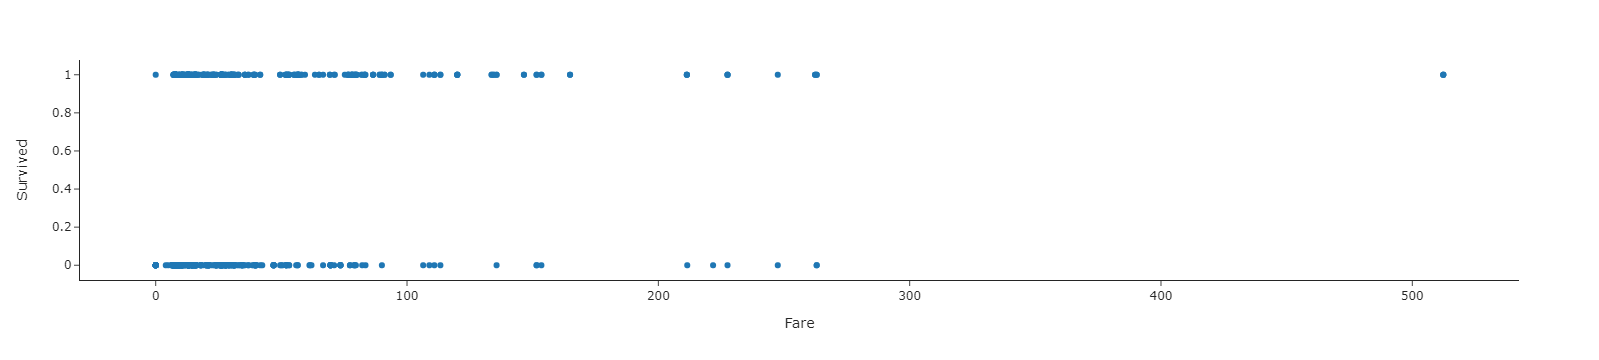

In [65]:
(
    px.scatter(data, x='Fare' , y='Survived')
   .show()
)

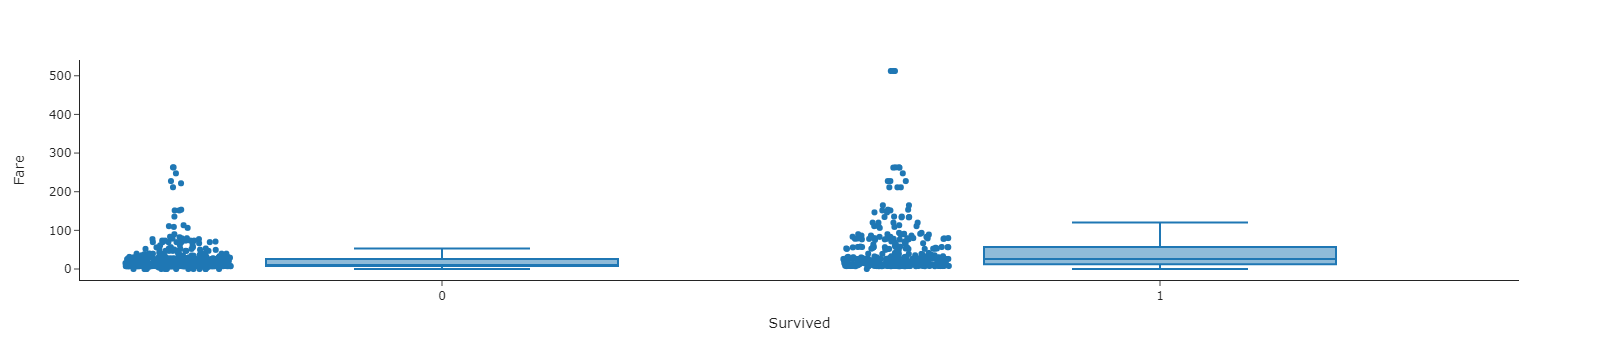

In [69]:
(
    px.box(data, x='Survived' , y='Fare', points="all")
   .show()
)

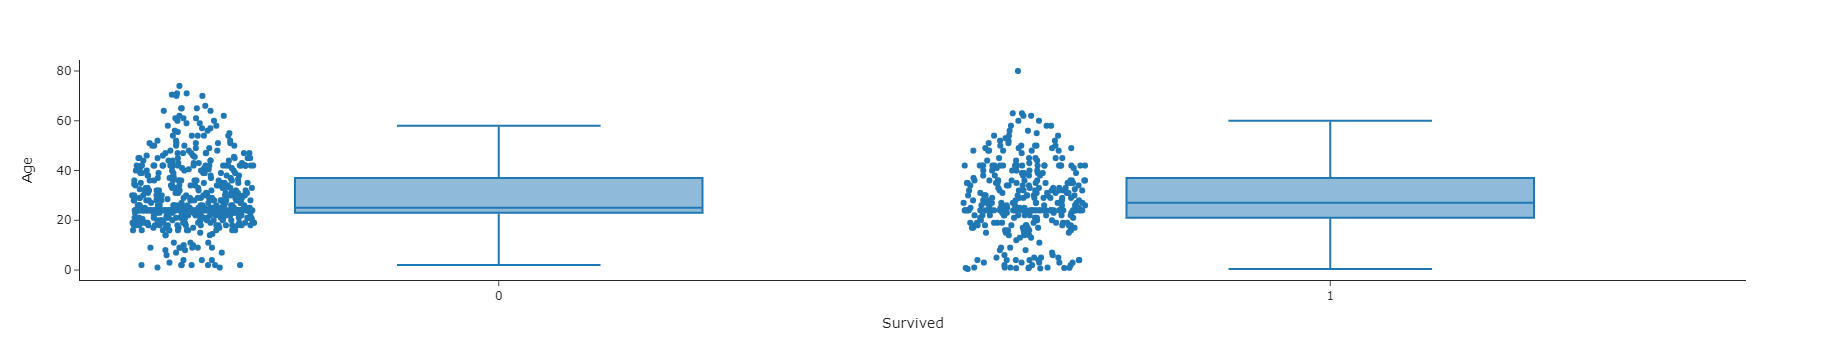

In [70]:
(
    px.box(data, x='Survived' , y='Age', points="all")
   .show()
)

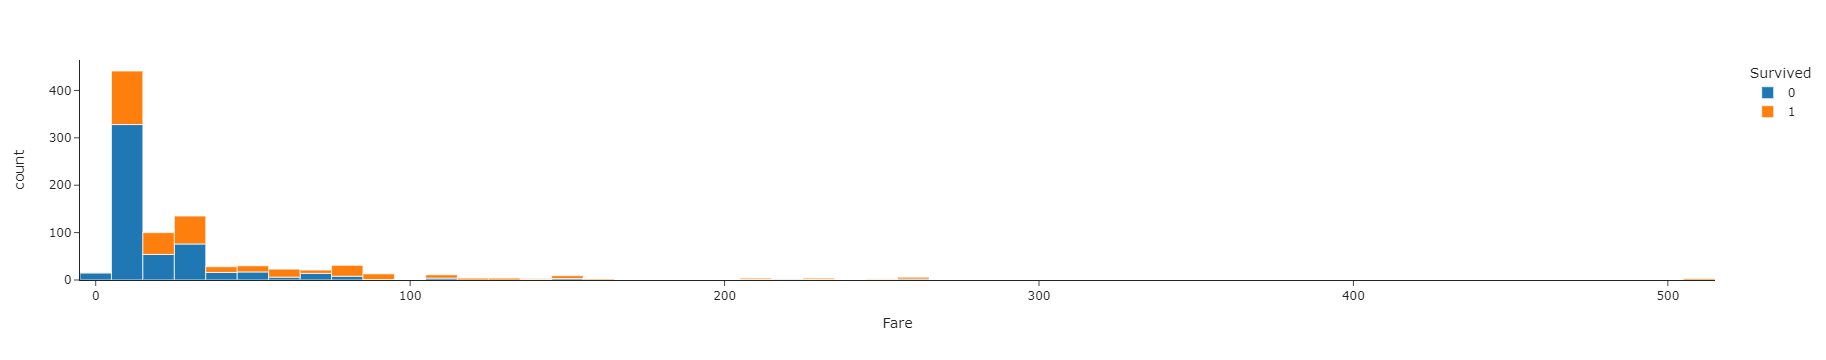

In [73]:
(
    px.histogram(data, x="Fare", color="Survived")
)

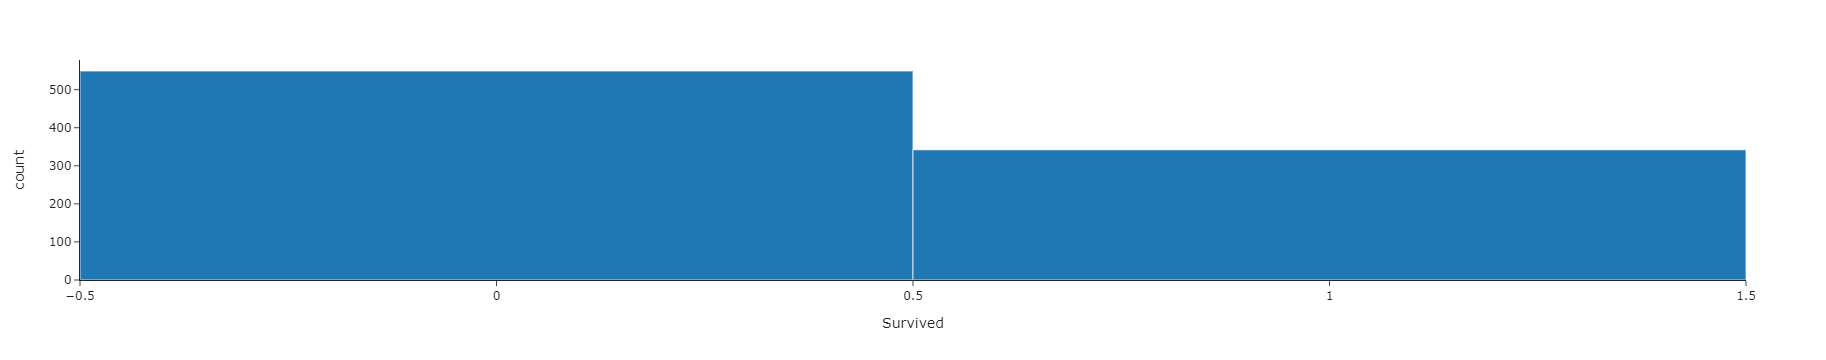

In [74]:
(
    px.histogram(data, x="Survived")
)

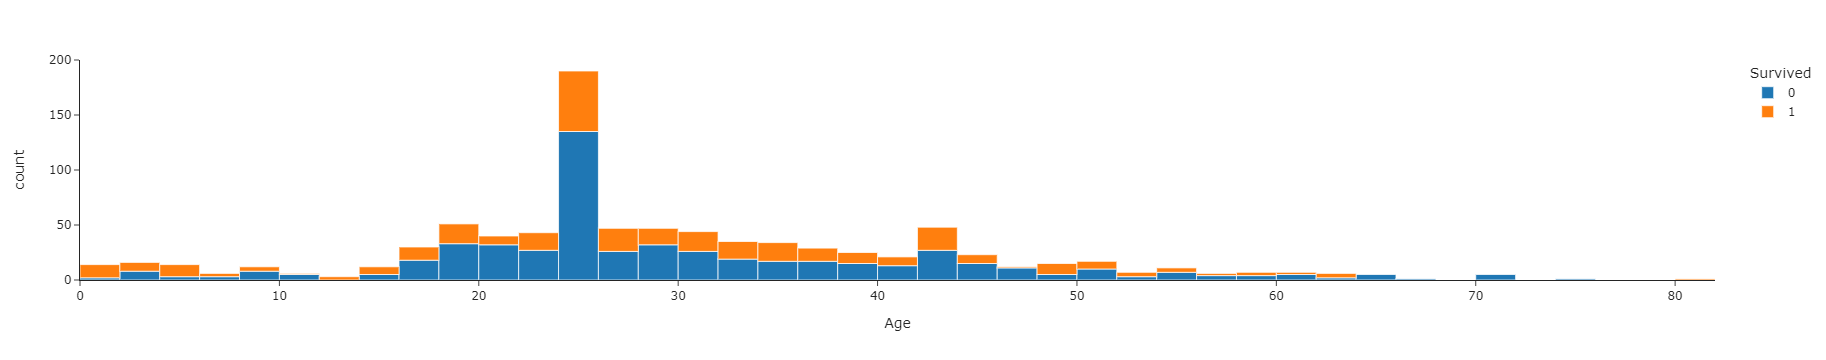

In [75]:
(
    px.histogram(data, x="Age", color="Survived")
)

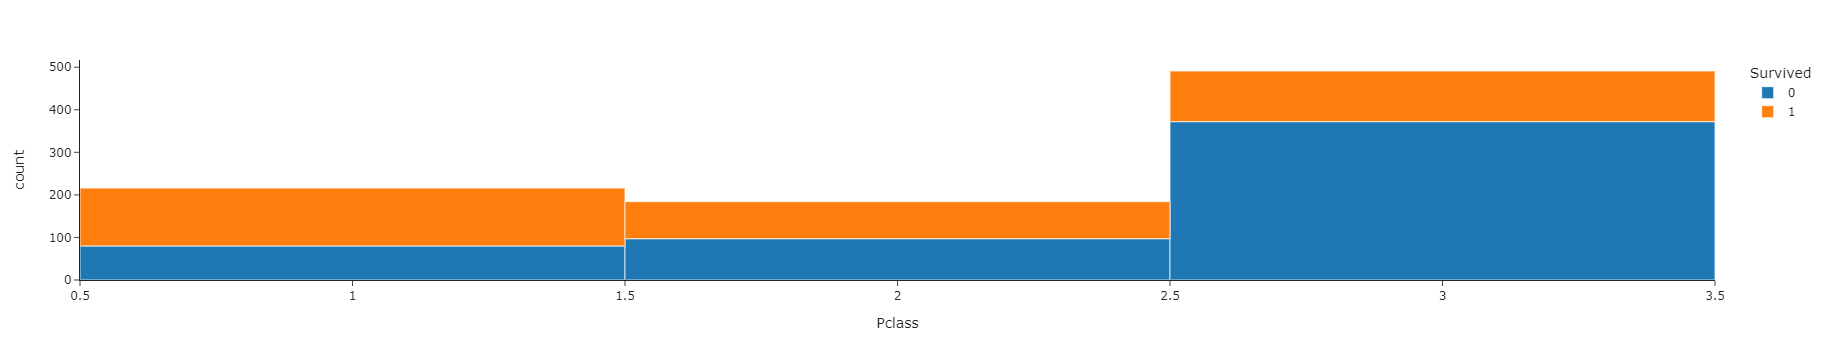

In [76]:
(
    px.histogram(data, x="Pclass", color="Survived")
)

In [79]:
data.drop(data[data.Fare > 500].index, inplace=True)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    int32  
 3   Age       888 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.5 KB


In [82]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,29.176993,0.524775,0.381757,30.582164,1.537162
std,0.486091,0.834007,0.478011,13.398152,1.104186,0.806949,41.176366,0.790854
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,30.771850,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,2.000000


## Stratified K Fold Cross Validation

Stratified K Fold used when just random shuffling and splitting the data is not sufficient, and we want to have correct distribution of data in each fold. In case of regression problem folds are selected so that the mean response value is approximately equal in all the folds.

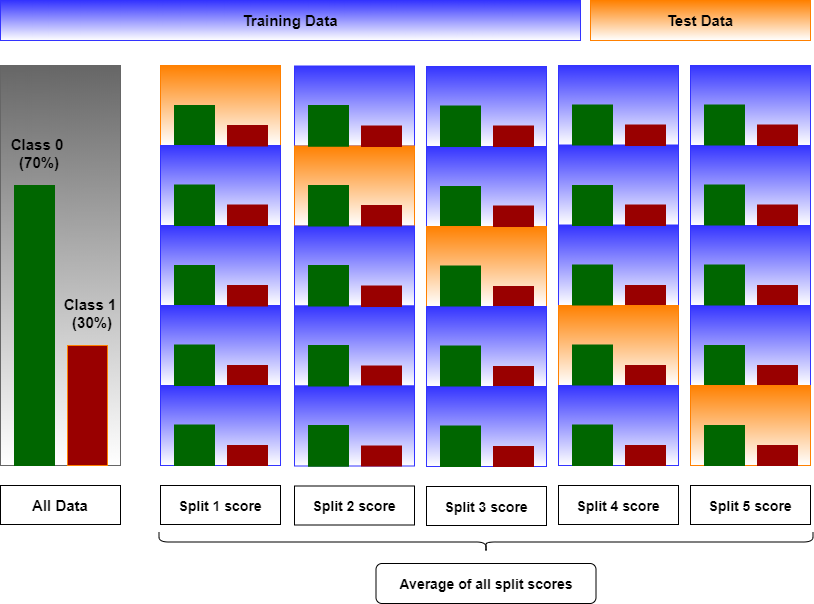

In [91]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [87]:
skf = StratifiedKFold(n_splits=3, shuffle=True)

## Model evaluation

In [111]:
from sklearn import linear_model, tree, ensemble
import numpy as np
import copy

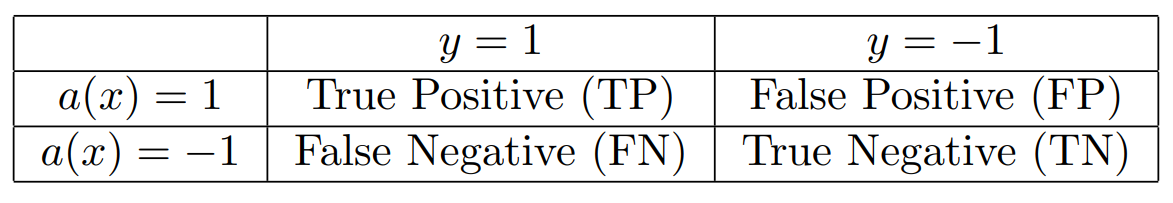

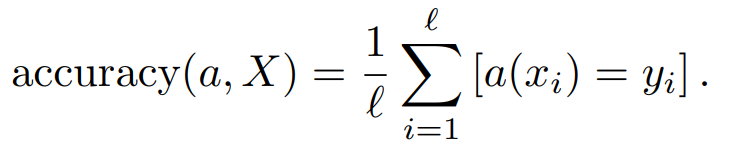

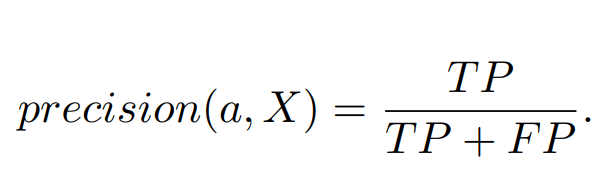

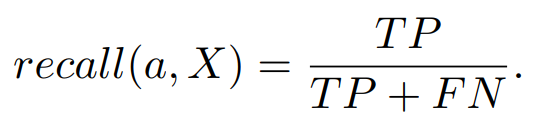

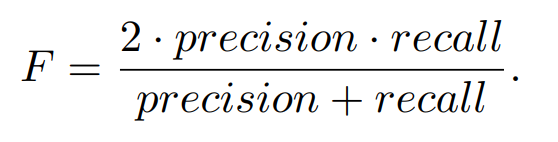

## Linear models

$$ a(x)=\operatorname{sign}\left(w_{0}+\sum_{j=1}^{d} w_{j} x^{j}\right) $$

In [94]:
y = copy.deepcopy(data.Survived)
X = data.drop(columns="Survived")

In [108]:
ridge_score_lst_accuracy = []
ridge_score_lst_precision = []
ridge_score_lst_recall = []
ridge_score_lst_F = []

def f_measure(precision, recall):
    return 2 * precision * recall / (precision + recall)
for a in np.linspace(0.01, 5, 50):
    ridge_model = linear_model.RidgeClassifier(alpha=a)
    score_accuracy = cross_val_score(ridge_model, X, y, cv=skf, scoring="accuracy")
    score_precision = cross_val_score(ridge_model, X, y, cv=skf, scoring="precision")
    score_recall = cross_val_score(ridge_model, X, y, cv=skf, scoring="recall")
    
    ridge_score_lst_accuracy.append(score_accuracy.mean())
    ridge_score_lst_precision.append(score_precision.mean())
    ridge_score_lst_recall.append(score_recall.mean())
    ridge_score_lst_F.append(f_measure(score_precision.mean(), score_recall.mean()))

In [109]:
max(ridge_score_lst_accuracy), max(ridge_score_lst_precision), max(ridge_score_lst_recall), max(ridge_score_lst_F)

(0.8051801801801801,
 0.7774526041378134,
 0.7109144542772862,
 0.7374264269216181)

In [110]:
log_reg = linear_model.LogisticRegression(max_iter=1000)
score_accuracy = cross_val_score(log_reg, X, y, cv=skf, scoring="accuracy")
score_precision = cross_val_score(log_reg, X, y, cv=skf, scoring="precision")
score_recall = cross_val_score(log_reg, X, y, cv=skf, scoring="recall")

print(score_accuracy.mean(), score_precision.mean(), score_recall.mean(), f_measure(score_precision.mean(), score_recall.mean()))

0.8051801801801801 0.7730570615062691 0.7079646017699116 0.7390803906055274


## Decision tree

In [112]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

decision_tree_score_lst_accuracy = []
decision_tree_score_lst_precision = []
decision_tree_score_lst_recall = []
decision_tree_score_lst_F = []
for d in max_depth:
    decision_tree = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    score_accuracy = cross_val_score(decision_tree, X, y, cv=skf, scoring="accuracy")
    score_precision = cross_val_score(decision_tree, X, y, cv=skf, scoring="precision")
    score_recall = cross_val_score(decision_tree, X, y, cv=skf, scoring="recall")
    
    decision_tree_score_lst_accuracy.append(score_accuracy.mean())
    decision_tree_score_lst_precision.append(score_precision.mean())
    decision_tree_score_lst_recall.append(score_recall.mean())
    decision_tree_score_lst_F.append(f_measure(score_precision.mean(), score_recall.mean()))

In [113]:
max(decision_tree_score_lst_accuracy), max(decision_tree_score_lst_precision), max(decision_tree_score_lst_recall), max(decision_tree_score_lst_F)

(0.8153153153153152, 0.835476569407604, 0.7050147492625368, 0.7376432201351922)

## Random forest

In [114]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]
random_forest_score_lst_accuracy = []
random_forest_score_lst_precision = []
random_forest_score_lst_recall = []
random_forest_score_lst_F = []

for estimator in n_estimators:
    rand_forest = ensemble.RandomForestClassifier(n_estimators=estimator, random_state=42)
    score_accuracy = cross_val_score(rand_forest, X, y, cv=skf, scoring="accuracy")
    score_precision = cross_val_score(rand_forest, X, y, cv=skf, scoring="precision")
    score_recall = cross_val_score(rand_forest, X, y, cv=skf, scoring="recall")
    
    random_forest_score_lst_accuracy.append(score_accuracy.mean())
    random_forest_score_lst_precision.append(score_precision.mean())
    random_forest_score_lst_recall.append(score_recall.mean())
    random_forest_score_lst_F.append(f_measure(score_precision.mean(), score_recall.mean()))

In [115]:
max(random_forest_score_lst_accuracy), max(random_forest_score_lst_precision), max(random_forest_score_lst_recall), max(random_forest_score_lst_F)

(0.813063063063063, 0.7832441118499683, 0.7463126843657818, 0.7582323777015808)